In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import librosa
import os
import pandas as pd
import numpy as np
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
os.listdir('/kaggle/input/capstone-data/wavfiles')

['Acoustic_guitar',
 'Clarinet',
 'Double_bass',
 'Bass_drum',
 'Saxophone',
 'Snare_drum',
 'Violin_or_fiddle',
 'Hi_hat',
 'Flute',
 'Cello']

In [4]:
import matplotlib.pyplot as plt
import pathlib
import os
import librosa

# Define colormap
cmap = plt.get_cmap('inferno')

# Define genres
genres = 'Acoustic_guitar Clarinet Double_bass Bass_drum Saxophone Snare_drum Violin_or_fiddle Hi_hat Flute Cello'.split()

# Create output directories
for g in genres:
    pathlib.Path(f'/kaggle/working/{g}').mkdir(parents=True, exist_ok=True)

# Loop through each genre and process audio files
for g in genres:
    for filename in os.listdir(f'/kaggle/input/capstone-data/wavfiles/{g}'):
        songname = f'/kaggle/input/capstone-data/wavfiles/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        
        # Create a new figure for each spectrogram
        plt.figure(figsize=(5, 5))
        plt.specgram(y, NFFT=2048, Fs=sr, Fc=0, noverlap=1024, cmap=cmap, sides='default', mode='default', scale='dB')
        plt.axis('off')
        
        # Save the spectrogram image
        plt.savefig(f'/kaggle/working/{g}/{filename[:3].replace(".", "")}.png')
        
        # Close the current figure to avoid overlapping plots
        plt.close()


In [5]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [6]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [7]:
import csv
import os
import librosa
import numpy as np

header = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate'] + [f'mfcc{i}' for i in range(1, 21)] + ['label']

file = open('/kaggle/working/NumericalAudioData.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

genres = 'Acoustic_guitar Clarinet Double_bass Bass_drum Saxophone Snare_drum Violin_or_fiddle Hi_hat Flute Cello'.split()
for g in genres:
    for filename in os.listdir(f'/kaggle/input/capstone-data/wavfiles/{g}'):
        songname = f'/kaggle/input/capstone-data/wavfiles/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
        rmse = np.mean(librosa.feature.rms(y=y))
        spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {chroma_stft} {rmse} {spec_cent} {spec_bw} {rolloff} {zcr}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        with open('/kaggle/working/NumericalAudioData.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())


In [8]:
data = pd.read_csv(filepath_or_buffer= '/kaggle/working/NumericalAudioData.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,160c92d7.wav,0.173995,0.047076,1083.044162,1679.014594,1702.628865,0.045216,-404.150299,102.987923,32.971775,...,-3.871746,-16.615633,-8.260704,-0.823244,12.260135,16.987709,7.697133,5.810553,6.824253,Acoustic_guitar
1,34747922.wav,0.142176,0.012705,1241.586739,1703.888345,1878.771973,0.050817,-594.620544,39.943810,0.148761,...,-5.399728,-6.889851,-10.963285,-14.369222,-8.313414,5.106666,26.794710,42.915375,39.191483,Acoustic_guitar
2,10da16fb.wav,0.184785,0.040165,1032.336444,1714.505526,1609.083557,0.044484,-407.315186,103.347771,39.074936,...,-0.544147,-9.658050,-5.877062,-1.457926,9.118932,15.298472,9.019799,5.918081,4.501279,Acoustic_guitar
3,a25423a8.wav,0.279664,0.016672,1400.923934,2104.306979,3244.699803,0.026749,-545.497620,34.907623,23.114855,...,0.599092,-1.076139,-3.055536,-4.306273,-5.433088,-5.807955,-5.218730,-4.881089,-4.715796,Acoustic_guitar
4,d8a257e5.wav,0.302316,0.012970,1595.848106,2361.882298,4160.297892,0.027657,-517.379028,43.449711,23.121592,...,-4.207108,-6.997639,-7.259221,-3.399546,-0.889377,-0.396418,0.205852,-0.040299,-1.511708,Acoustic_guitar


In [9]:
print(data.shape)

(300, 28)


In [10]:
data["label"].value_counts()

label
Acoustic_guitar     30
Clarinet            30
Double_bass         30
Bass_drum           30
Saxophone           30
Snare_drum          30
Violin_or_fiddle    30
Hi_hat              30
Flute               30
Cello               30
Name: count, dtype: int64

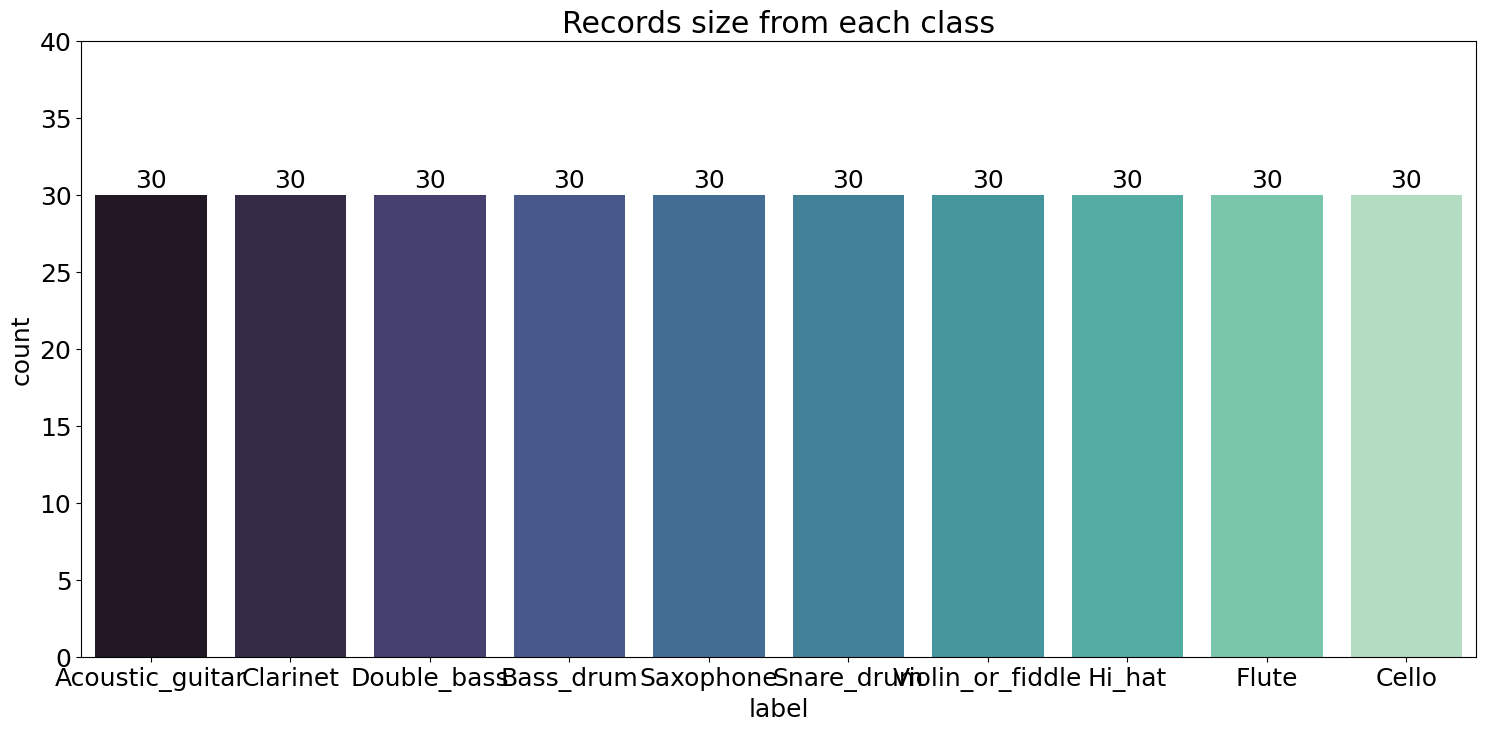

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
plt.rcParams["font.size"] = 18

# Assuming 'data' is your DataFrame containing the column 'label'
ax = sns.countplot(x="label", data=data, palette="mako")
plt.title("Records size from each class")
plt.ylim(0, 40)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


In [12]:
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(300, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         300 non-null    float64
 1   rmse                300 non-null    float64
 2   spectral_centroid   300 non-null    float64
 3   spectral_bandwidth  300 non-null    float64
 4   rolloff             300 non-null    float64
 5   zero_crossing_rate  300 non-null    float64
 6   mfcc1               300 non-null    float64
 7   mfcc2               300 non-null    float64
 8   mfcc3               300 non-null    float64
 9   mfcc4               300 non-null    float64
 10  mfcc5               300 non-null    float64
 11  mfcc6               300 non-null    float64
 12  mfcc7               300 non-null    float64
 13  mfcc8               300 non-null    float64
 14  mfcc9               300 non-null    float64
 15  mfcc10              300 non-null    float64
 16  mfcc11  

In [15]:
genre_list = data.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [16]:
data['label'] = y

In [17]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.173995,0.047076,1083.044162,1679.014594,1702.628865,0.045216,-404.150299,102.987923,32.971775,10.663536,...,-3.871746,-16.615633,-8.260704,-0.823244,12.260135,16.987709,7.697133,5.810553,6.824253,0
1,0.142176,0.012705,1241.586739,1703.888345,1878.771973,0.050817,-594.620544,39.943810,0.148761,-0.305339,...,-5.399728,-6.889851,-10.963285,-14.369222,-8.313414,5.106666,26.794710,42.915375,39.191483,0
2,0.184785,0.040165,1032.336444,1714.505526,1609.083557,0.044484,-407.315186,103.347771,39.074936,15.757830,...,-0.544147,-9.658050,-5.877062,-1.457926,9.118932,15.298472,9.019799,5.918081,4.501279,0
3,0.279664,0.016672,1400.923934,2104.306979,3244.699803,0.026749,-545.497620,34.907623,23.114855,19.789633,...,0.599092,-1.076139,-3.055536,-4.306273,-5.433088,-5.807955,-5.218730,-4.881089,-4.715796,0
4,0.302316,0.012970,1595.848106,2361.882298,4160.297892,0.027657,-517.379028,43.449711,23.121592,20.185610,...,-4.207108,-6.997639,-7.259221,-3.399546,-0.889377,-0.396418,0.205852,-0.040299,-1.511708,0


In [18]:
data["label"].value_counts()

label
0    30
3    30
4    30
1    30
7    30
8    30
9    30
6    30
5    30
2    30
Name: count, dtype: int64

In [19]:
records = []
for i in range(len(list(data["label"].value_counts()))):
    rec=data.loc[data["label"]==i]
    records.append(rec)

In [20]:
len(records)

10

In [21]:
from sklearn.utils import resample

In [22]:
from sklearn.utils import resample

oversampled = []
for i in range(len(records)):
    sel_rec = records[i]
    resampled_rec = resample(sel_rec, n_samples=200)  # Using the resample function from sklearn.utils
    oversampled.append(resampled_rec)

data = pd.concat(objs=oversampled, ignore_index=True)


In [23]:
data["label"].value_counts()

label
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64

In [24]:

X = data.drop(labels="label", axis=1)
y=data["label"]

In [25]:
y.value_counts()

label
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64

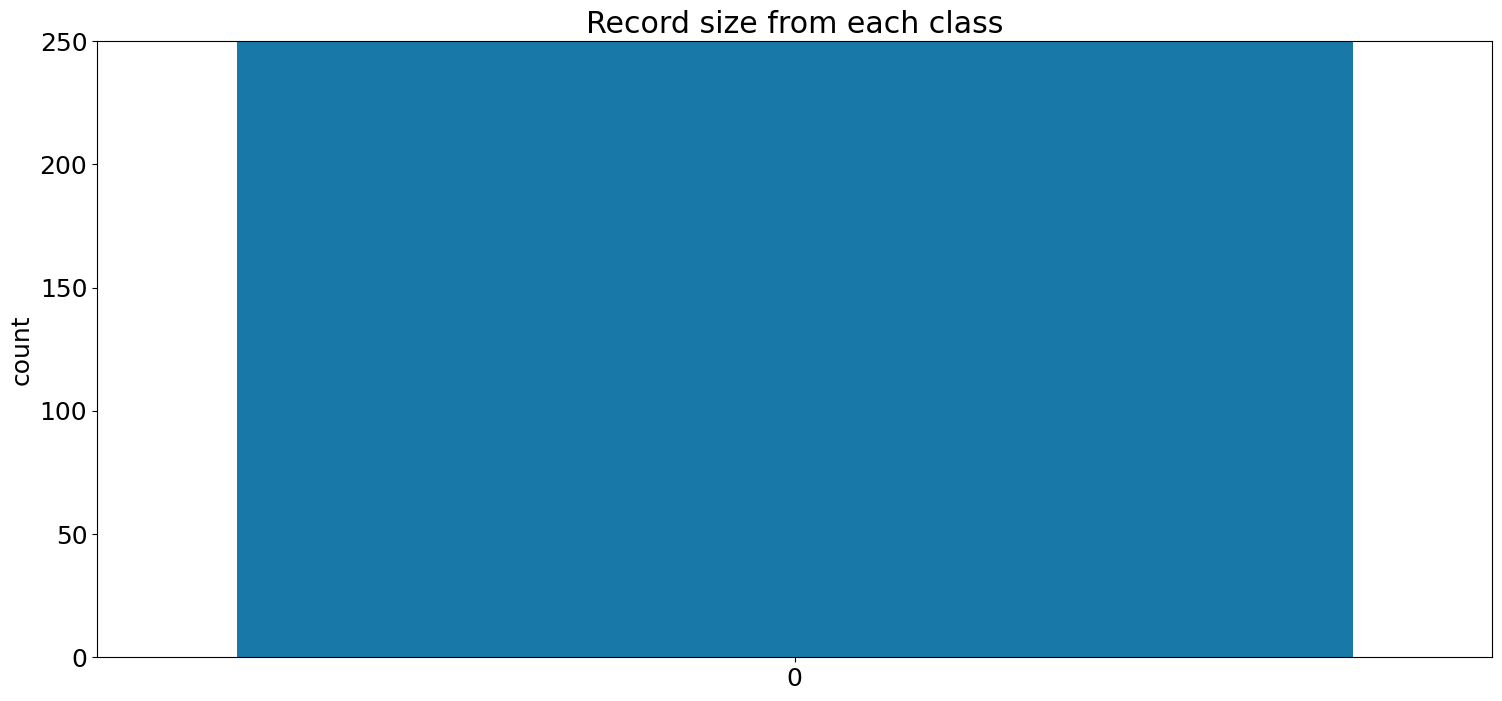

In [26]:

plt.figure(figsize=(18, 8))
plt.rcParams["font.size"] = 18
ax = sns.countplot(y, palette="winter")
plt.title(label="Record size from each class")
plt.ylim(0, 250)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.18,p.get_height()+10))
plt.show()


In [27]:
X

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.208210,0.058284,492.407640,988.396322,677.052432,0.025118,-516.620239,97.764206,68.146744,51.128609,...,4.617788,2.206966,1.676155,0.765312,-1.334088,-4.279402,-7.819812,-9.183488,-8.327821,-6.579902
1,0.326705,0.040405,1037.106028,1871.894094,1827.888077,0.032399,-444.323364,103.106865,49.038734,32.212662,...,-1.040744,0.441682,-0.665187,1.566880,4.006159,5.130958,2.718884,0.477288,-2.609743,-2.372916
2,0.235275,0.214501,1616.355389,2011.733812,3472.695764,0.043176,-146.192886,123.659286,9.287984,17.274521,...,-7.023737,-16.791460,-8.067145,-13.178169,-5.075226,-5.924755,-14.290862,-9.775476,-12.730184,-5.137896
3,0.279664,0.016672,1400.923934,2104.306979,3244.699803,0.026749,-545.497620,34.907623,23.114855,19.789633,...,0.961980,0.599092,-1.076139,-3.055536,-4.306273,-5.433088,-5.807955,-5.218730,-4.881089,-4.715796
4,0.110805,0.021661,2200.865886,1877.949330,3671.411133,0.168146,-544.901367,17.298702,-7.466751,-4.229236,...,-17.244408,-22.085060,-0.878448,12.666081,6.116123,-1.315734,7.363553,2.675519,-23.783829,-18.989441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.200082,0.075049,1203.940836,1427.442267,2103.323680,0.047085,-382.973694,62.746155,-24.150385,32.867451,...,-6.238914,8.424651,6.330343,7.983763,11.404301,1.907999,-0.847858,10.259901,5.697922,0.138384
1996,0.225620,0.038321,1934.302259,2234.472083,3801.123047,0.118955,-364.474731,100.785118,14.746662,14.644487,...,9.671893,15.195946,1.415991,-1.843485,-15.180420,5.703030,8.489398,-2.808138,-5.980171,-1.948578
1997,0.232672,0.126599,2220.759672,1694.664147,3626.857236,0.133542,-182.111862,55.684582,-74.846718,30.156212,...,-22.357061,-10.318944,-3.979799,9.648613,8.701946,8.619910,1.204909,11.830244,10.439817,0.768390
1998,0.148174,0.005478,2023.925114,2381.714750,4326.635742,0.055443,-699.752380,48.066742,15.780951,8.422932,...,-11.052294,-10.141512,-9.224657,-10.205064,-10.049931,-9.710834,-6.087210,-0.733968,6.976774,18.502914


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [29]:
print(X)

[[-0.73329965 -0.13306057 -1.31919026 ... -0.90806385 -0.56132222
  -0.58206567]
 [-0.07684797 -0.377219   -0.86665404 ... -0.05310141 -0.10454318
  -0.28488486]
 [-0.58336286  2.00026758 -0.38541283 ... -0.96045376 -0.91299758
  -0.48020258]
 ...
 [-0.59778303  0.79986286  0.11672713 ...  0.95161613  0.93789906
  -0.06298348]
 [-1.06589487 -0.85419193 -0.04680331 ... -0.16029557  0.66125963
   1.18978054]
 [-0.8171424  -0.20346163  0.42046332 ... -0.62030695  2.04658548
   2.29465796]]


In [30]:
import os
import pickle

# Create the directory if it doesn't exist
directory = "/kaggle/working/models"
if not os.path.exists(directory):
    os.makedirs(directory)

# Now you can save the scaler object
with open(file="/kaggle/working/models/scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1600, 26) (400, 26) (1600,) (400,)


In [32]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [33]:
predictions_svm = model_svm.predict(X_test)

In [34]:
acc_svm = accuracy_score(y_true=y_test, y_pred=predictions_svm)
print("Overall accuracy of SVM Model using test-set is : %f" %(acc_svm*100))

Overall accuracy of SVM Model using test-set is : 95.750000


In [35]:
print(classification_report(y_test, predictions_svm, target_names=['Acoustic_guitar', 'Clarinet' ,'Double_bass', 'Bass_drum' , 'Saxophone' , 'Snare_drum' , 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello']))

                  precision    recall  f1-score   support

 Acoustic_guitar       0.92      0.92      0.92        36
        Clarinet       1.00      0.96      0.98        47
     Double_bass       0.98      0.89      0.93        46
       Bass_drum       0.92      1.00      0.96        36
       Saxophone       0.83      1.00      0.91        34
      Snare_drum       1.00      0.97      0.99        34
Violin_or_fiddle       1.00      1.00      1.00        33
          Hi_hat       1.00      0.93      0.96        44
           Flute       0.94      1.00      0.97        48
           Cello       1.00      0.93      0.96        42

        accuracy                           0.96       400
       macro avg       0.96      0.96      0.96       400
    weighted avg       0.96      0.96      0.96       400



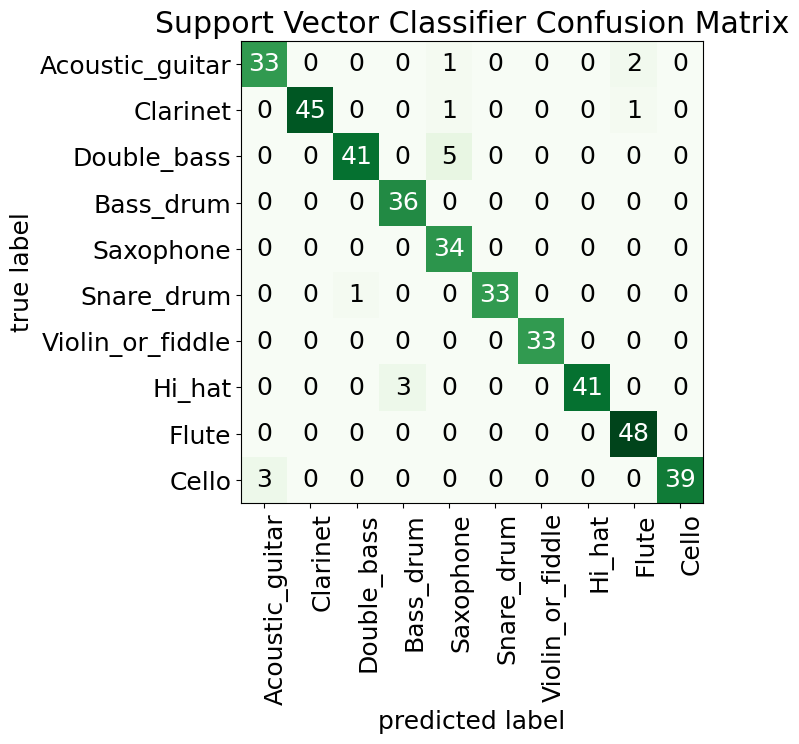

In [36]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predictions_svm),
                           class_names=['Acoustic_guitar', 'Clarinet' ,'Double_bass', 'Bass_drum' , 'Saxophone' , 'Snare_drum' , 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello']
                        , figsize=(6,6),
                           cmap=plt.cm.Greens)
plt.title(label="Support Vector Classifier Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

**RIDGE CLASSIFIER**

In [37]:
from sklearn.linear_model import RidgeClassifier
rc_model = RidgeClassifier()
rc_model = rc_model.fit(X_train, y_train)

In [38]:
predictions_rc = rc_model.predict(X_test)

In [39]:
acc_rc = accuracy_score(y_true= y_test, y_pred = predictions_rc)
print("Overall accuracy of RC Model using test set is : %f" %(acc_rc*100) )

Overall accuracy of RC Model using test set is : 81.750000


In [40]:
print(classification_report(y_test, predictions_rc, target_names=['Acoustic_guitar', 'Clarinet' ,'Double_bass', 'Bass_drum' , 'Saxophone' , 'Snare_drum' , 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello']))

                  precision    recall  f1-score   support

 Acoustic_guitar       0.62      0.83      0.71        36
        Clarinet       0.89      1.00      0.94        47
     Double_bass       0.90      0.78      0.84        46
       Bass_drum       0.74      0.72      0.73        36
       Saxophone       0.67      0.59      0.62        34
      Snare_drum       0.77      0.97      0.86        34
Violin_or_fiddle       0.94      0.97      0.96        33
          Hi_hat       0.76      0.70      0.73        44
           Flute       0.96      0.90      0.92        48
           Cello       0.94      0.69      0.79        42

        accuracy                           0.82       400
       macro avg       0.82      0.82      0.81       400
    weighted avg       0.83      0.82      0.82       400



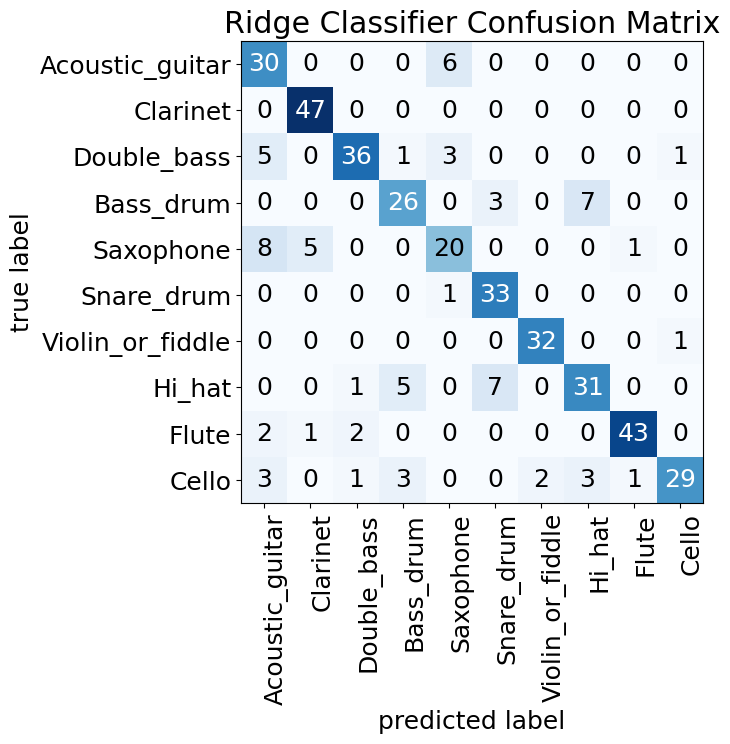

In [41]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predictions_rc),
                           class_names=['Acoustic_guitar', 'Clarinet' ,'Double_bass', 'Bass_drum' , 'Saxophone' , 'Snare_drum' , 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello']
                        , figsize=(6,6),
                           cmap=plt.cm.Blues)
plt.title(label="Ridge Classifier Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

**K neighbor**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
predictions_knn = knn_model.predict(X_test)

In [44]:
acc_knn = accuracy_score(y_true= y_test, y_pred = predictions_knn)
print("Overall accuracy of KNN using test set is : %f" %(acc_knn*100) )

Overall accuracy of KNN using test set is : 97.000000


In [45]:
print(classification_report(y_test, predictions_knn, target_names=['Acoustic_guitar', 'Clarinet' ,'Double_bass', 'Bass_drum' , 'Saxophone' , 'Snare_drum' , 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello']))

                  precision    recall  f1-score   support

 Acoustic_guitar       0.82      1.00      0.90        36
        Clarinet       1.00      0.98      0.99        47
     Double_bass       1.00      1.00      1.00        46
       Bass_drum       1.00      1.00      1.00        36
       Saxophone       0.97      1.00      0.99        34
      Snare_drum       1.00      0.94      0.97        34
Violin_or_fiddle       1.00      1.00      1.00        33
          Hi_hat       1.00      1.00      1.00        44
           Flute       0.94      0.94      0.94        48
           Cello       1.00      0.86      0.92        42

        accuracy                           0.97       400
       macro avg       0.97      0.97      0.97       400
    weighted avg       0.97      0.97      0.97       400



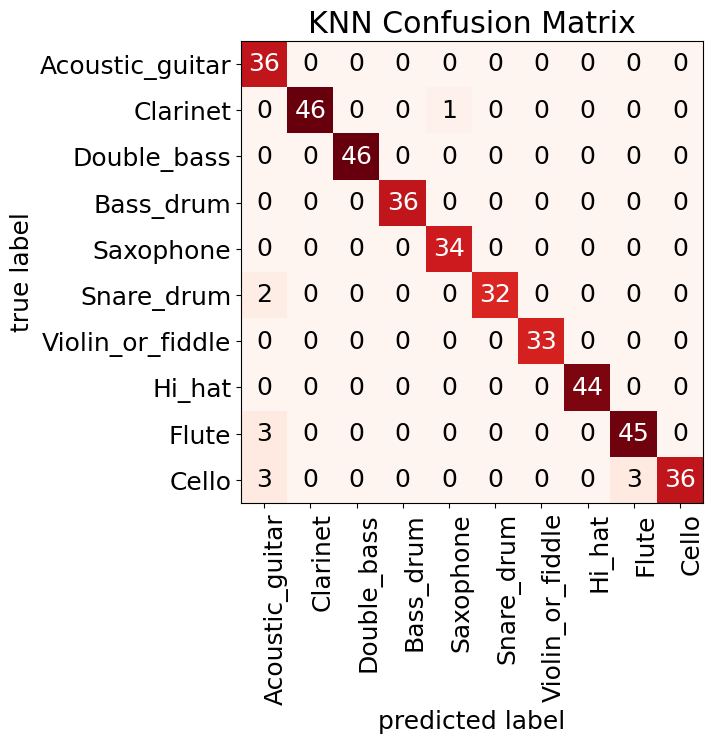

In [46]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predictions_knn),
                           class_names=['Acoustic_guitar', 'Clarinet' ,'Double_bass', 'Bass_drum' , 'Saxophone' , 'Snare_drum' , 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello']
                        , figsize=(6,6),
                           cmap=plt.cm.Reds)
plt.title(label="KNN Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

In [47]:
import pickle
pickle.dump(obj=model_svm, file=open("/kaggle/working/models/SupportVectorClassifier_model.pkl", mode="wb"))
pickle.dump(obj=model_svm, file=open("/kaggle/working/models/RidgeClassifier_model.pkl", mode="wb"))
pickle.dump(obj=model_svm, file=open("/kaggle/working/models/KNeighborsClassifier_model.pkl", mode="wb"))

**ANN**

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2024-03-12 10:48:07.610394: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 10:48:07.610538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 10:48:07.750784: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [49]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [50]:
ann_model = Sequential()
ann_model.add(Dense(units=128, activation="relu", input_dim=X_train.shape[1]))
ann_model.add(Dense(units=128, activation="relu"))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(units=256, activation="relu"))
ann_model.add(Dense(units=128, activation="relu"))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(units=512, activation="relu"))
ann_model.add(Dense(units=10, activation="softmax"))  # Change units to 10


In [51]:
ann_model.compile(optimizer=Adam(learning_rate=1e-4),loss="categorical_crossentropy", metrics=["accuracy"])

In [52]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,066 (613.54 KB)

 Trainable params: 157,066 (613.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history=ann_model.fit(x=X_train,y=y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1500 - loss: 2.2816 - val_accuracy: 0.3625 - val_loss: 2.1601
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3745 - loss: 2.1185 - val_accuracy: 0.5050 - val_loss: 1.8239
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5063 - loss: 1.7254 - val_accuracy: 0.6650 - val_loss: 1.2590
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6301 - loss: 1.2375 - val_accuracy: 0.7525 - val_loss: 0.8678
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6943 - loss: 0.9597 - val_accuracy: 0.8025 - val_loss: 0.6901
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7570 - loss: 0.7734 - val_accuracy: 0.8275 - val_loss: 0.5819
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7786 - loss: 0.6675 - val_accuracy: 0.8250 - val_loss: 0.5115
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8126 - loss: 0.5877 - val_accuracy: 0.8825 - val_loss:

**ACCURACY AND PLOT**

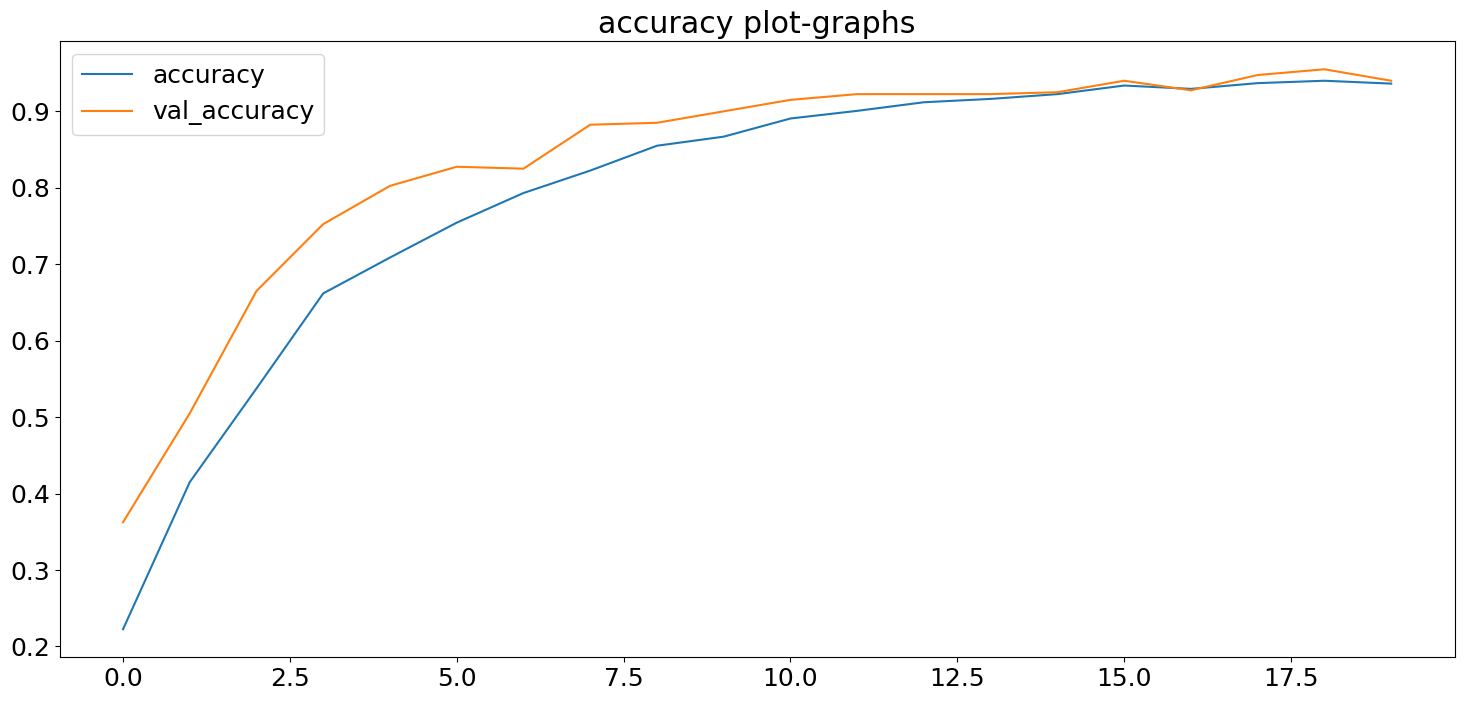

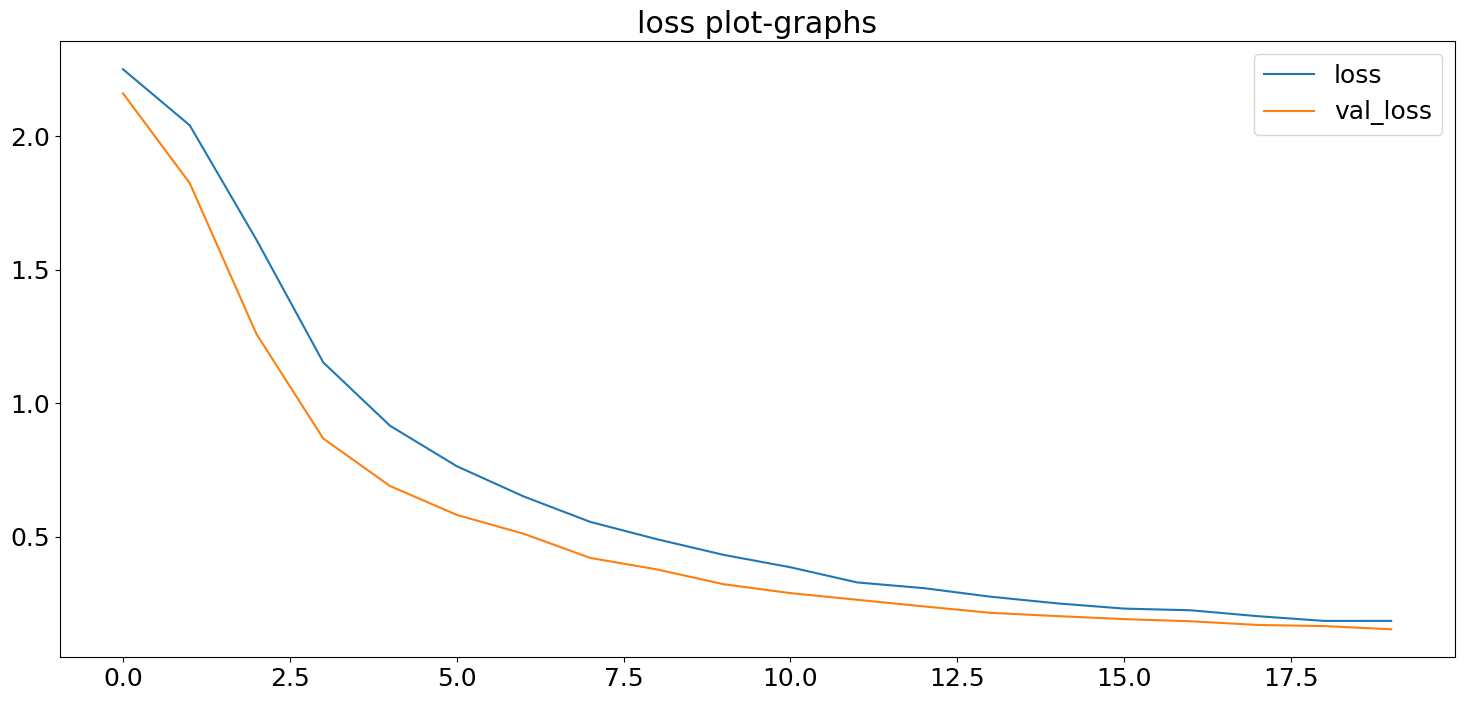

In [54]:
plt.figure(figsize=(18,8))
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.title(label="accuracy plot-graphs")
plt.legend()
plt.show()

plt.figure(figsize=(18,8))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title(label="loss plot-graphs")
plt.legend()
plt.show()

In [55]:
ann_prediction=ann_model.predict(X_test,batch_size=32,verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [56]:
print(ann_prediction)

[[7.8567052e-01 1.1608882e-05 7.7572479e-03 ... 1.9329711e-04
  1.2379602e-01 6.4518601e-02]
 [4.6516050e-07 9.9973464e-01 2.4861708e-07 ... 8.6457118e-07
  1.7219560e-05 1.2647311e-05]
 [2.2344365e-07 7.5832409e-05 2.1552266e-08 ... 5.1838406e-06
  2.3421689e-04 7.7739296e-06]
 ...
 [5.7618257e-02 2.6714290e-04 1.0164715e-03 ... 7.9141068e-04
  9.1599739e-01 3.3674017e-03]
 [5.9054020e-08 9.9995071e-01 1.7129895e-07 ... 7.4425515e-08
  2.3403220e-06 9.5488085e-06]
 [1.8501818e-03 1.3779483e-05 9.9594325e-01 ... 1.6408976e-06
  2.0530979e-05 4.9691767e-05]]


In [57]:
ann_pred=[]
for i in range(len(ann_prediction)):
    ann_pred.append(np.argmax(ann_prediction[i]))

In [58]:
print(ann_pred)

[0, 1, 6, 8, 6, 6, 4, 8, 0, 6, 0, 6, 5, 2, 1, 1, 3, 0, 8, 9, 3, 8, 9, 5, 9, 0, 5, 4, 3, 0, 3, 4, 2, 4, 5, 2, 8, 6, 5, 1, 8, 9, 1, 2, 7, 4, 2, 4, 0, 8, 7, 1, 7, 1, 4, 8, 6, 8, 5, 1, 7, 3, 8, 5, 9, 9, 4, 7, 0, 7, 7, 1, 6, 5, 3, 1, 8, 3, 1, 9, 0, 4, 7, 7, 8, 7, 8, 2, 1, 8, 7, 8, 1, 1, 9, 9, 3, 6, 7, 9, 4, 4, 2, 6, 1, 4, 3, 1, 3, 2, 3, 7, 5, 8, 3, 1, 5, 4, 1, 8, 9, 5, 5, 2, 1, 7, 2, 4, 5, 1, 9, 9, 3, 2, 4, 6, 9, 0, 8, 7, 6, 1, 8, 4, 7, 2, 3, 6, 1, 4, 1, 4, 3, 5, 1, 4, 2, 8, 2, 8, 3, 4, 4, 5, 9, 7, 8, 6, 1, 8, 5, 3, 9, 9, 2, 6, 3, 6, 4, 8, 6, 3, 9, 0, 4, 3, 9, 8, 5, 6, 3, 4, 6, 1, 0, 2, 5, 4, 3, 7, 9, 2, 0, 3, 2, 1, 7, 6, 5, 4, 8, 4, 1, 0, 3, 9, 5, 1, 2, 6, 4, 8, 2, 5, 9, 9, 2, 0, 8, 1, 9, 1, 8, 7, 8, 1, 5, 4, 6, 2, 3, 7, 2, 4, 6, 0, 4, 9, 4, 6, 5, 1, 5, 2, 7, 5, 4, 3, 9, 6, 0, 9, 4, 7, 5, 7, 1, 0, 1, 5, 6, 9, 2, 8, 9, 9, 3, 2, 7, 1, 9, 7, 3, 6, 6, 0, 1, 8, 0, 4, 6, 7, 7, 8, 2, 1, 0, 8, 9, 2, 2, 0, 9, 7, 3, 9, 5, 6, 4, 0, 5, 8, 6, 4, 5, 2, 7, 7, 9, 7, 0, 8, 0, 1, 4, 2, 9, 3, 8, 3, 4, 2, 7, 

In [59]:
y_true=[]
for i in range(len(y_test)):
    y_true.append(np.argmax(y_test[i]))

In [60]:
print(y_true)

[9, 1, 6, 4, 6, 6, 4, 8, 0, 6, 0, 6, 5, 2, 1, 1, 3, 0, 8, 9, 3, 8, 9, 5, 9, 0, 5, 4, 3, 0, 3, 4, 2, 4, 5, 2, 8, 6, 5, 1, 0, 9, 1, 2, 7, 4, 2, 4, 0, 8, 7, 1, 7, 1, 4, 8, 6, 8, 5, 1, 7, 3, 8, 5, 9, 9, 4, 7, 0, 7, 7, 1, 6, 5, 3, 1, 8, 3, 1, 9, 0, 4, 7, 7, 8, 7, 8, 2, 1, 8, 7, 8, 1, 1, 9, 9, 3, 6, 7, 9, 4, 4, 2, 6, 1, 4, 3, 1, 3, 2, 3, 7, 5, 8, 3, 1, 5, 4, 1, 8, 9, 5, 5, 2, 1, 7, 2, 4, 5, 1, 9, 9, 3, 2, 4, 6, 9, 9, 8, 7, 6, 1, 8, 4, 7, 2, 3, 6, 1, 0, 8, 4, 3, 5, 1, 0, 2, 8, 2, 8, 3, 4, 0, 5, 9, 7, 8, 6, 1, 8, 5, 3, 9, 9, 2, 6, 3, 6, 4, 8, 6, 3, 9, 5, 4, 3, 9, 8, 5, 6, 3, 1, 6, 1, 0, 2, 5, 4, 3, 7, 9, 2, 0, 3, 2, 1, 7, 6, 5, 0, 8, 0, 1, 0, 3, 9, 5, 1, 2, 6, 4, 0, 2, 5, 9, 9, 2, 0, 8, 1, 9, 1, 8, 7, 8, 1, 5, 4, 6, 2, 3, 7, 2, 4, 6, 0, 4, 9, 4, 6, 5, 1, 5, 2, 7, 5, 2, 3, 9, 6, 0, 9, 0, 7, 5, 7, 1, 0, 1, 5, 6, 9, 2, 8, 9, 9, 3, 2, 7, 1, 9, 7, 3, 6, 6, 0, 1, 8, 0, 0, 6, 7, 7, 8, 2, 1, 0, 8, 9, 2, 2, 0, 9, 7, 3, 9, 5, 6, 4, 0, 5, 8, 6, 4, 5, 2, 7, 7, 9, 7, 0, 8, 0, 1, 4, 2, 9, 3, 8, 3, 2, 2, 7, 

result analysis


accuracy

In [61]:
acc_ann = accuracy_score(y_true=y_true, y_pred=ann_pred)
print("Overall accuracy of ANN Model using test-set is : %f" %(acc_ann*100))

Overall accuracy of ANN Model using test-set is : 94.000000


CLASSIFICATION REPORT

In [62]:
print(classification_report(y_true=y_true, y_pred=ann_pred, target_names=['Acoustic_guitar', 'Clarinet' ,'Double_bass', 'Bass_drum' , 'Saxophone' , 'Snare_drum' , 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello']))

                  precision    recall  f1-score   support

 Acoustic_guitar       0.86      0.67      0.75        36
        Clarinet       0.96      0.96      0.96        47
     Double_bass       1.00      0.93      0.97        46
       Bass_drum       1.00      1.00      1.00        36
       Saxophone       0.70      0.97      0.81        34
      Snare_drum       1.00      0.97      0.99        34
Violin_or_fiddle       1.00      1.00      1.00        33
          Hi_hat       1.00      1.00      1.00        44
           Flute       0.92      0.96      0.94        48
           Cello       1.00      0.93      0.96        42

        accuracy                           0.94       400
       macro avg       0.94      0.94      0.94       400
    weighted avg       0.95      0.94      0.94       400



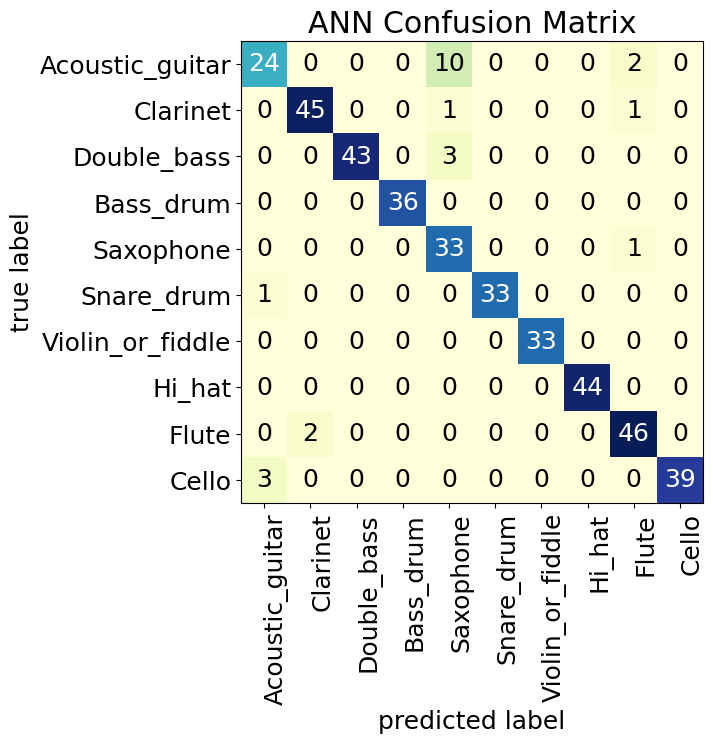

In [63]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and ann_pred are defined
ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_true, ann_pred),
                           class_names=['Acoustic_guitar', 'Clarinet', 'Double_bass', 'Bass_drum', 'Saxophone', 'Snare_drum', 'Violin_or_fiddle', 'Hi_hat', 'Flute', 'Cello'],
                           figsize=(6, 6),
                           cmap=plt.cm.YlGnBu)
plt.title(label="ANN Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


In [64]:
ann_model.save(filepath="/kaggle/working/models/ArtificialNeuralNetwork_model.h5")

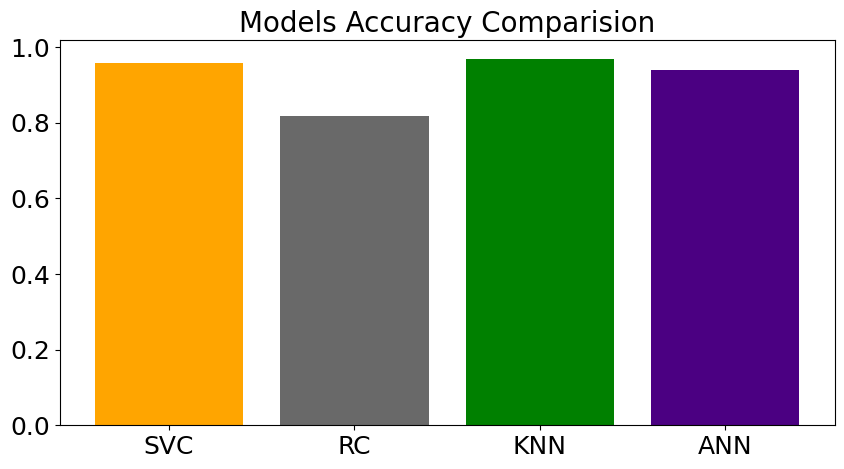

In [65]:
accuracy_data=[acc_svm,acc_rc,acc_knn,acc_ann]
labels=["SVC","RC","KNN","ANN"]
colors=["orange","dimgray","green","indigo"]
plt.figure(figsize=(10,5))
plt.bar(x=labels,height=accuracy_data,color=colors)
plt.title("Models Accuracy Comparision", fontsize=20)
plt.show()